In [16]:
import pandas as pd

In [17]:
regression_df = pd.read_csv("clean_data/ELA and Math clean.csv")
regression_df

,RCDTS,County,Dist #,District Name/ School Name,City,ELA,Math
0,010010010260001,Adams,10,Seymour High School,Payson,524.3,489.1
1,010010020260001,Adams,20,Liberty High School,Liberty,500.9,485.4
2,010010030260001,Adams,30,Central High School,Camp Point,490.6,488.3
3,010010040260001,Adams,40,Unity High School,Mendon,505.9,485.0
4,010011720220003,Adams,1720,Quincy Sr High School,Quincy,489.9,473.8
...,...,...,...,...,...,...,...
705,56099207U260001,Will,207U,Peotone High School,Peotone,514.0,493.7
706,56099209U260001,Will,209U,Wilmington High School,Wilmington,482.1,460.0
707,56099255U260001,Will,255U,Reed-Custer High School,Braidwood,480.3,484.9
708,56099365U260007,Will,365U,Bolingbrook High School,Bolingbrook,490.0,490.8


In [18]:
general_df = pd.read_csv("clean_data/high_school_filtered.csv")
general_df

,RCDTS,Type,District,School Type,City,County,District Type,District Size,Student Enrollment - Total,Student Enrollment - Low Income %,...,Teacher Retention Rate,# of 12 graders who took advanced Courses,Avg Number of days of Physical Education Per Week Per Student,Community College Remediation %,Avg Class Size - High School,Chronic Absenteeism,Number of students who took AP Exams Grade 10,Number of students who passed AP Exams Grade 12,Chronic Absenteeism - Low Income,Low Income Count
0,010011720220003,School,Quincy SD 172,HIGH SCHOOL,Quincy,Adams,UNIT,LARGE,1753.0,50.3,...,81.9,151.0,5.0,29.2,20.0,31.3,35.0,120.0,47.5,881.759
1,010691170220014,School,Jacksonville SD 117,HIGH SCHOOL,Jacksonville,Morgan,UNIT,LARGE,986.0,47.4,...,85.9,41.0,4.0,69.0,17.0,26.1,11.0,49.0,37.4,467.364
2,040041000260002,School,Belvidere CUSD 100,HIGH SCHOOL,Belvidere,Boone,UNIT,LARGE,1515.0,32.7,...,91.9,136.0,5.0,40.5,22.0,18.7,16.0,25.0,30.1,495.405
3,040042000260003,School,North Boone CUSD 200,HIGH SCHOOL,Poplar Grove,Boone,UNIT,MEDIUM,503.0,45.3,...,80.5,30.0,5.0,33.3,18.0,3.4,44.0,33.0,6.2,227.859
4,041011220220002,School,Harlem UD 122,HIGH SCHOOL,Machesney Park,Winnebago,UNIT,LARGE,1529.0,49.2,...,84.3,132.0,5.0,38.3,21.0,43.2,35.0,271.0,55.1,752.268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0560992100160004,School,Lincoln Way CHSD 210,HIGH SCHOOL,New Lenox,Will,HIGH SCHOOL,LARGE,1905.0,8.5,...,90.0,290.0,5.0,37.2,20.0,19.3,138.0,500.0,0.0,161.925
201,056099200U260001,School,Beecher CUSD 200U,HIGH SCHOOL,Beecher,Will,UNIT,MEDIUM,323.0,24.5,...,80.3,37.0,4.0,45.5,14.0,14.6,13.0,31.0,18.6,79.135
202,056099201U260001,School,Crete Monee CUSD 201U,HIGH SCHOOL,Crete,Will,UNIT,LARGE,1638.0,67.4,...,72.9,253.0,5.0,47.0,23.0,30.4,35.0,51.0,35.5,1104.012
203,056099365U260007,School,Valley View CUSD 365U,HIGH SCHOOL,Bolingbrook,Will,UNIT,LARGE,3550.0,59.4,...,90.0,410.0,5.0,45.1,19.0,32.5,261.0,511.0,39.5,2108.700


In [19]:
gen_df = general_df.filter(['RCDTS', 'Student Enrollment - Low Income %', 'Avg Class Size – All Grades', 'Avg Teaching Exp',
                           'Bachelor Degree', 'Masters Degree', 'Teacher Retention Rate', 'Admin Avg Salary'], axis = 1)
gen_df = gen_df.dropna()
gen_df.rename(columns = {'Avg Class Size – All Grades':'ClassSize'}, inplace = True)
gen_df.rename(columns = {'Student Enrollment - Low Income %':'LowIncome'}, inplace = True)
gen_df.rename(columns = {'Teacher Retention Rate':'TeachRetRate'}, inplace = True)
gen_df

,RCDTS,LowIncome,ClassSize,TeachRetRate
0,010011720220003,50.3,20.0,81.9
1,010691170220014,47.4,17.0,85.9
2,040041000260002,32.7,22.0,91.9
3,040042000260003,45.3,18.0,80.5
4,041011220220002,49.2,21.0,84.3
...,...,...,...,...
200,0560992100160004,8.5,20.0,90.0
201,056099200U260001,24.5,14.0,80.3
202,056099201U260001,67.4,23.0,72.9
203,056099365U260007,59.4,19.0,90.0


In [20]:
df = pd.merge(regression_df, gen_df, on = "RCDTS", how = "inner")
df = df.dropna()
df

,RCDTS,County,Dist #,District Name/ School Name,City,ELA,Math,LowIncome,ClassSize,TeachRetRate
0,010011720220003,Adams,1720,Quincy Sr High School,Quincy,489.9,473.8,50.3,20.0,81.9
1,010691170220014,Morgan,1170,Jacksonville High School,Jacksonville,485.8,470.0,47.4,17.0,85.9
2,040041000260002,Boone,1000,Belvidere North High Sch,Belvidere,505.3,494.7,32.7,22.0,91.9
3,040042000260003,Boone,2000,North Boone High School,Poplar Grove,512.5,496.0,45.3,18.0,80.5
4,041011220220002,Winnebago,1220,Harlem High School,Machesney Park,495.0,470.0,49.2,21.0,84.3
...,...,...,...,...,...,...,...,...,...,...
56,070162300130003,Cook,2300,Victor J Andrew High School,Orland Hills,519.2,524.3,17.2,17.0,96.7
57,070162330160001,Cook,2330,Homewood-Flossmoor High School,Flossmoor,513.1,494.1,22.6,14.0,90.8
58,090100030260001,Champaign,30,Mahomet-Seymour High School,Mahomet,583.9,605.0,16.6,17.0,89.6
59,090100040260001,Champaign,40,Centennial High School,Champaign,513.9,519.8,56.2,16.0,85.8


In [21]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

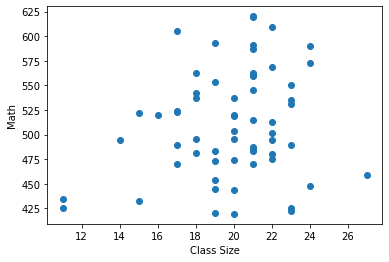

(61,)


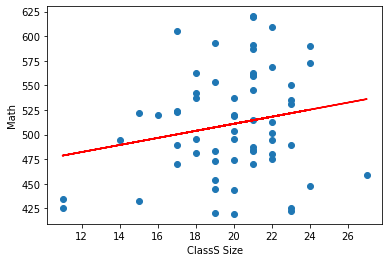

Coefficient  [3.58986697]
Intercept  439.14428695760284


In [22]:
plt.scatter(df.ClassSize, df.Math)
plt.xlabel('Class Size')
plt.ylabel('Math')
plt.show()

X = df.ClassSize.values.reshape(-1, 1)
y = df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('ClassS Size')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

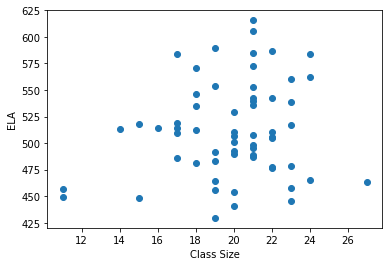

(61,)


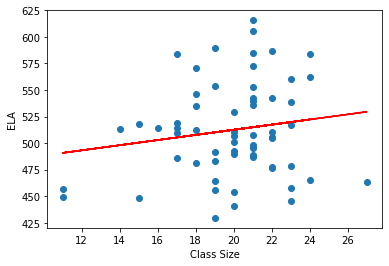

Coefficient  [2.42176116]
Intercept  464.09642546313563


In [23]:
plt.scatter(df.ClassSize, df.ELA)
plt.xlabel('Class Size')
plt.ylabel('ELA')
plt.show()

X = df.ClassSize.values.reshape(-1, 1)
y = df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Class Size')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
plt.show()

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

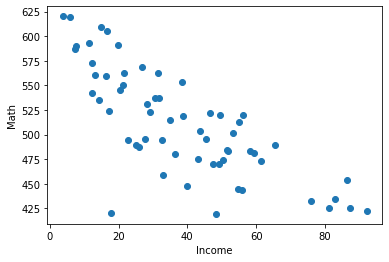

None
(61,)


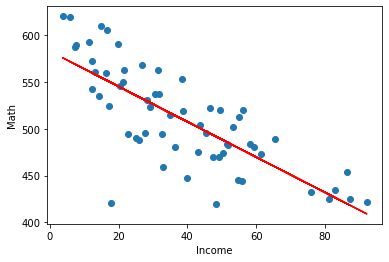

None
Coefficient  [-1.88477055]
Intercept  582.8679303784542


In [24]:
plt.scatter(df.LowIncome, df.Math)
plt.xlabel('Income')
plt.ylabel('Math')
print(plt.show())

X = df.LowIncome.values.reshape(-1, 1)
y = df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Income')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
print(plt.show())

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

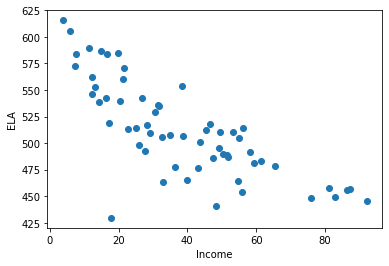

None
(61,)


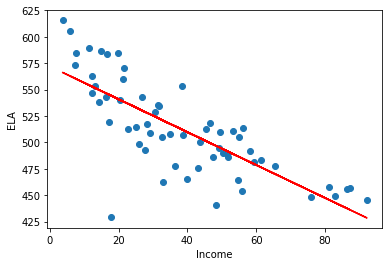

None
Coefficient  [-1.55764439]
Intercept  572.0278280892833


In [25]:
plt.scatter(df.LowIncome, df.ELA)
plt.xlabel('Income')
plt.ylabel('ELA')
print(plt.show())

X = df.LowIncome.values.reshape(-1, 1)
y = df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Income')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
print(plt.show())

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

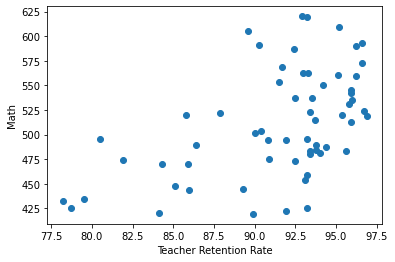

None
(61,)


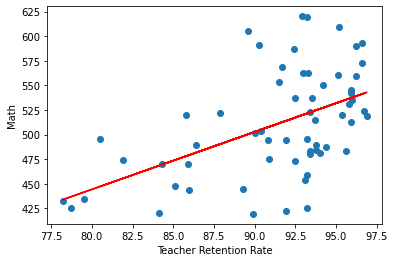

None
Coefficient  [5.8370546]
Intercept  -22.650335725113393


In [26]:
plt.scatter(df.TeachRetRate, df.Math)
plt.xlabel('Teacher Retention Rate')
plt.ylabel('Math')
print(plt.show())

X = df.TeachRetRate.values.reshape(-1, 1)
y = df.Math
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Teacher Retention Rate')
plt.ylabel('Math')
plt.plot(X, y_pred, color='red')
print(plt.show())

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)

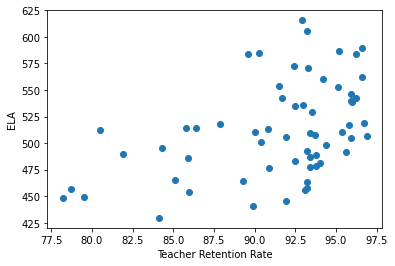

None
(61,)


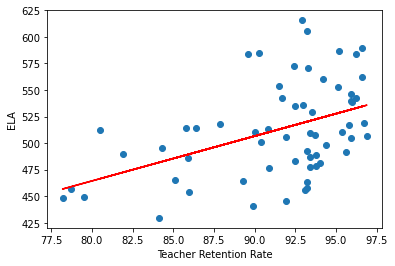

None
Coefficient  [4.22581458]
Intercept  126.24796159676629


In [27]:
plt.scatter(df.TeachRetRate, df.ELA)
plt.xlabel('Teacher Retention Rate')
plt.ylabel('ELA')
print(plt.show())

X = df.TeachRetRate.values.reshape(-1, 1)
y = df.ELA
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

plt.scatter(X, y)
plt.xlabel('Teacher Retention Rate')
plt.ylabel('ELA')
plt.plot(X, y_pred, color='red')
print(plt.show())

print("Coefficient ", model.coef_)
print("Intercept ", model.intercept_)